In [16]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np # linear algebra
from PIL import Image
import pandas as pd
import torchvision
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision import datasets, transforms, models

In [17]:
model = models.densenet121(pretrained=True)

In [18]:
model.cpu()

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [19]:
# Freeze parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad = False

from collections import OrderedDict
classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(1024, 500)),
                          ('relu', nn.ReLU()),
                          ('fc2', nn.Linear(500, 2)),
                          ('output', nn.LogSoftmax(dim=1))
                          ]))
    
model.classifier = classifier

In [20]:
device = torch.device('cpu')
model.load_state_dict(torch.load('cat_dog.pt', map_location=device))

<All keys matched successfully>

In [21]:
test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

In [22]:
test_data = datasets.ImageFolder('test2', transform=test_transforms)

In [23]:
testloader = torch.utils.data.DataLoader(test_data, batch_size=64)

In [ ]:
image, label = next(iter(testloader))
images = Variable(image)
y_pred = model(images)
prob = nnf.softmax(y_pred, dim=1)
top_p, top_class = prob.topk(2, dim = 1)
_,pred = torch.max(y_pred.data, 1)

In [14]:
classes = ['cat','dog']
classes_index = {'dog':1,'cat':0}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pred Label: ['cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog']


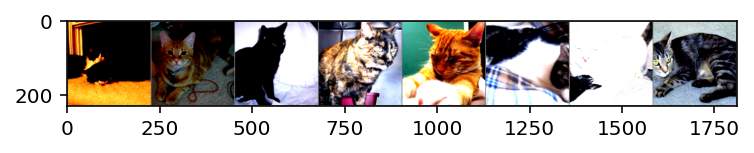

In [15]:
img = torchvision.utils.make_grid(image)
img = img.numpy().transpose(1,2,0)
mean = [0.5, 0.5, 0.5]
std = [0.5, 0.5, 0.5]
img = img * std + mean
print("Pred Label:", [classes[i] for i in pred])
plt.imshow(img)